In [1]:
# 比赛地址 https://biendata.com/competition/mobike/rules/

############# 1.数据预处理 ################
import numpy as np
import tensorflow as tf
import pandas as pd
from pandas import Series,DataFrame

data_train = pd.read_csv(r"F:/data/mobike/train.csv")
data_test = pd.read_csv(r"F:/data/mobike/test.csv")
data_train

,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc
0,1893973,451147,210617,2,2017/5/14 22:16,wx4snhx,wx4snhj
1,4657992,1061133,465394,1,2017/5/14 22:16,wx4dr59,wx4dquz
2,2965085,549189,310572,1,2017/5/14 22:16,wx4fgur,wx4fu5n
3,4548579,489720,456688,1,2017/5/14 22:16,wx4d5r5,wx4d5r4
4,3936364,467449,403224,1,2017/5/14 22:16,wx4g27p,wx4g266
5,5163705,917620,509044,1,2017/5/14 22:16,wx4gd2e,wx4g6pw
6,19818,583391,3190,1,2017/5/14 22:16,wx4fhkk,wx4fh7q
7,495333,185893,67441,1,2017/5/14 22:16,wx4emgw,wx4emgk
8,2803108,15906,295614,2,2017/5/14 22:16,wx4f8t9,wx4f8tj
9,271970,183740,38335,1,2017/5/14 22:16,wx4dzjf,wx4dzhn


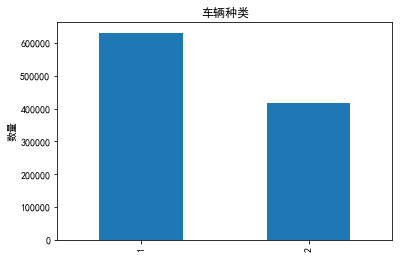

In [14]:
import matplotlib.pyplot as plt
from pylab import * 
mpl.rcParams['font.sans-serif'] = ['SimHei']  
mpl.rcParams['axes.unicode_minus'] = False 

fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((1,1),(0,0))             # 在一张大图里分列几个小图
data_train.biketype.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"车辆种类") # 标题
plt.ylabel(u"数量")  
 
plt.show()

In [2]:
places = data_train['userid'].drop_duplicates()
print('userid:',places.count())
places = data_train['bikeid'].drop_duplicates()
print('bikeid:',places.count())
places = data_train['geohashed_start_loc'].drop_duplicates()
print('geohashed_start_loc：',places.count())
places = data_train['geohashed_end_loc'].drop_duplicates()
print("geohashed_end_loc:",places.count())

userid: 279811
bikeid: 376556
geohashed_start_loc： 71258
geohashed_end_loc: 66047


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
orderid                1048575 non-null int64
userid                 1048575 non-null int64
bikeid                 1048575 non-null int64
biketype               1048575 non-null int64
starttime              1048575 non-null object
geohashed_start_loc    1048575 non-null object
geohashed_end_loc      1048575 non-null object
dtypes: int64(4), object(3)
memory usage: 56.0+ MB


In [4]:
data_train.describe()

,orderid,userid,bikeid,biketype
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.539313e+06,5.343573e+05,2.678361e+05,1.397676e+00
std,1.474689e+06,3.074832e+05,1.413905e+05,4.894180e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.248936e+06,2.688910e+05,1.495675e+05,1.000000e+00
50%,2.550815e+06,5.342170e+05,2.723300e+05,1.000000e+00
75%,3.800162e+06,8.006285e+05,3.900825e+05,2.000000e+00
max,5.217091e+06,1.065576e+06,5.161950e+05,2.000000e+00


In [5]:
############ 2.特征提取 ###############
## geohash与经纬度互相转换 （取区块中心经纬度）
# geohash原理：http://www.cnblogs.com/tgzhu/p/6204173.html
# LAL means longitude and latitude
# wx4g0e -- (116.389550, 39.928167)
def LAL2geohash(lo,la):
    loLeft =  -180.0
    loRight =  180.0
    loBit = ''
    for _ in range(17):
        loMid = (loLeft+loRight)/2.0
        if lo<loMid:
            loRight = loMid
            loBit += '0'
        else:
            loLeft = loMid
            loBit += '1'
    laLeft =  -90.0
    laRight =  90.0
    laBit = ''
    for _ in range(17):
        laMid = (laLeft+laRight)/2.0
        if la<laMid:
            laRight = laMid
            laBit += '0'
        else:
            laLeft = laMid
            laBit += '1'
        
    lolaBit = ''
    for i in range(17):
        lolaBit = lolaBit+loBit[i]+laBit[i]
    
    lolaBit+=lolaBit+'0'
    geoDict = {'00000':'0','00001':'1','00010':'2','00011':'3','00100':'4','00101':'5','00110':'6','00111':'7','01000':'8',
              '01001':'9','01010':'b','01011':'c','01100':'d','01101':'e','01110':'f','01111':'g','10000':'h','10001':'j',
              '10010':'k','10011':'m','10100':'n','10101':'p','10110':'q','10111':'r','11000':'s','11001':'t','11010':'u',
              '11011':'v','11100':'w','11101':'x','11110':'y','11111':'z'}
    geohash = ''
    l=0
    while l < 7:
        tmp = lolaBit[l*5:l*5+5]
        geohash+=geoDict[tmp]
        l+=1

    return geohash

def geohash2LAL(geohash):
    re_geoDict = {'c': '01011', '1': '00001', 'p': '10101', '7': '00111', 'q': '10110','r': '10111', '9': '01001', 'b': '01010',
               'k': '10010', 'w': '11100', 'v': '11011', 'h': '10000', '2': '00010', '3': '00011', 't': '11001', 'u': '11010',
               'f': '01110', 'x': '11101', '0': '00000', 'n': '10100',  'e': '01101', '8': '01000', 'm': '10011', 'j': '10001', 
               '5': '00101', 'z': '11111', '6': '00110', 's': '11000', 'd': '01100', 'y': '11110', '4': '00100', 'g': '01111'}
    re_lolaBit=''
    for i in geohash:
        re_lolaBit+=re_geoDict[i]
     
    re_geoDict = re_lolaBit[:-1]
    re_loBit = ''
    re_laBit = ''
    lo = 1
    for i in re_lolaBit:
        if lo:
            re_loBit+=i
            lo=0
        else:
            re_laBit+=i
            lo=1
            
    loLeft =  -180.0
    loRight =  180.0
    for i in re_loBit:
        if i=='1':
            loLeft = (loLeft+loRight)/2.0
        else:
            loRight = (loLeft+loRight)/2.0
    lo = (loLeft+loRight)/2.0
    
    laLeft =  -90.0
    laRight =  90.0
    for i in re_laBit:
        if i=='1':
            laLeft = (laLeft+laRight)/2.0
        else:
            laRight = (laLeft+laRight)/2.0
    la = (laLeft+laRight)/2.0
    
    return round(lo, 6),round(la, 6)

print(LAL2geohash(116.39122, 39.92775))
print(geohash2LAL('wx4g0s9'))

wx4g0s9
(116.39122, 39.92775)


In [6]:
data1=data_train.copy()
t1 = data1['geohashed_start_loc'].apply(geohash2LAL)
t2 = data1['geohashed_end_loc'].apply(geohash2LAL)
print(t1[:3])

0    (116.289597, 40.103531)
1    (116.325302, 39.790421)
2    (116.542282, 39.882431)
Name: geohashed_start_loc, dtype: object


In [7]:
f1 = lambda x:x[0]
f2 = lambda x:x[1]
data1['start_lo'] = t1.apply(f1)
data1['start_la'] = t1.apply(f2)
data1['end_lo'] = t2.apply(f1)
data1['end_la'] = t2.apply(f2)
data1['dist_horiz'] = data1['start_lo']-data1['end_lo']
data1['dist_vertic'] = data1['start_la']-data1['end_la']
print(data1[:5])

   orderid   userid  bikeid  biketype        starttime geohashed_start_loc  \
0  1893973   451147  210617         2  2017/5/14 22:16             wx4snhx   
1  4657992  1061133  465394         1  2017/5/14 22:16             wx4dr59   
2  2965085   549189  310572         1  2017/5/14 22:16             wx4fgur   
3  4548579   489720  456688         1  2017/5/14 22:16             wx4d5r5   
4  3936364   467449  403224         1  2017/5/14 22:16             wx4g27p   

  geohashed_end_loc    start_lo   start_la      end_lo     end_la  dist_horiz  \
0           wx4snhj  116.289597  40.103531  116.286850  40.100784    0.002747   
1           wx4dquz  116.325302  39.790421  116.322556  39.797287    0.002746   
2           wx4fu5n  116.542282  39.882431  116.551895  39.875565   -0.009613   
3           wx4d5r4  116.163254  39.765701  116.161880  39.765701    0.001374   
4           wx4g266  116.388474  39.963455  116.381607  39.959335    0.006867   

   dist_vertic  
0     0.002747  
1    -0.00

In [15]:
data_time = pd.DataFrame(data1['starttime'].copy())
f_time_data = lambda x:x.split(' ')[0]
data_time['start_data'] = data_time['starttime'].apply(f_time_data)
f_time_time = lambda x:x.split(' ')[1]
data_time['start_time'] = data_time['starttime'].apply(f_time_time)

def isWeekend(data):
    data_day = data.split('/')[2] #观察数据都是在5月，则只取日期，然后从5月1号(周1)开始算
    weekday = (int(data_day)-1)%7+1
    if weekday>5:
        return 1
    else:
        return 0
data_time['isWeekend'] = data_time['start_data'].apply(isWeekend)

#初始就分三段把。。。
#后续：时间段分为7个：0:0-5点 1:5-9 2:9-11 3:11-13 4:13-15 5:15-17 6:17-20 7:20-0
def time1(time):
    time_t = int(time.split(':')[0])
    if time_t >=0 and time_t<12:
        return 1
    else:return 0
    
def time2(time):
    time_t = int(time.split(':')[0])
    if time_t >=12 and time_t<18:
        return 1
    else:return 0
    
def time3(time):
    time_t = int(time.split(':')[0])
    if time_t >=18 and time_t<24:
        return 1
    else:return 0
        
data_time['time1'] = data_time['start_time'].apply(time1)
data_time['time2'] = data_time['start_time'].apply(time2)
data_time['time3'] = data_time['start_time'].apply(time3)

print(data_time[:5])

         starttime start_data start_time  isWeekend  time1  time2  time3
0  2017/5/14 22:16  2017/5/14      22:16          1      0      0      1
1  2017/5/14 22:16  2017/5/14      22:16          1      0      0      1
2  2017/5/14 22:16  2017/5/14      22:16          1      0      0      1
3  2017/5/14 22:16  2017/5/14      22:16          1      0      0      1
4  2017/5/14 22:16  2017/5/14      22:16          1      0      0      1


In [20]:
#先去掉多余的特征，只考虑定位
data_x = data_time.copy()
data_x = data_x.drop(['starttime','start_data','start_time'],axis=1)
data_x['start_lo'] = data1['start_lo'].copy()
data_x['start_la'] = data1['start_la'].copy()

data_y = data1.copy()
data_y = data_y.drop(['orderid','userid','bikeid','biketype','starttime','geohashed_start_loc','geohashed_end_loc','start_lo','start_la','end_lo','end_la'],axis=1)
print(data_x[:3])
print(data_y[:3])


   isWeekend  time1  time2  time3    start_lo   start_la
0          1      0      0      1  116.289597  40.103531
1          1      0      0      1  116.325302  39.790421
2          1      0      0      1  116.542282  39.882431
   dist_horiz  dist_vertic
0    0.002747     0.002747
1    0.002746    -0.006866
2   -0.009613     0.006866


In [12]:
#划分验证集
data_train_x = data_x[0:1000000]
data_train_y = data_y[0:1000000]
data_dev_x = data_x[1000000:]
data_dev_y = data_x[1000000:]
print(data_dev_x[:5])

         isWeekend  time1  time2  time3    start_lo   start_la
1000000          1      0      1      0  116.444778  39.859085
1000001          1      0      1      0  116.645279  39.898911
1000002          1      0      1      0  116.411819  39.940109
1000003          1      0      1      0  116.459885  39.875565
1000004          1      0      1      0  116.252518  39.914017


In [23]:
#数据归一化
data_train_x1 = data_x[0:100000]
data_train_x1.loc[:,'start_lo'] = data_train_x1.loc[:,'start_lo'] - data_train_x1['start_lo'].mean()
data_train_y1 = data_y[0:100000]
data_train_x1

c:\users\fire\appdata\local\programs\python\python35\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,isWeekend,time1,time2,time3,start_lo,start_la
0,1,0,0,1,-0.108905,40.103531
1,1,0,0,1,-0.073200,39.790421
2,1,0,0,1,0.143780,39.882431
3,1,0,0,1,-0.235248,39.765701
4,1,0,0,1,-0.010028,39.963455
5,1,0,0,1,0.072369,39.993668
6,1,0,0,1,0.161633,39.750595
7,1,0,0,1,-0.121265,39.966202
8,1,0,0,1,-0.007282,39.845352
9,1,0,0,1,-0.071827,39.890671


In [ ]:
#同样处理test数据

In [ ]:
###### 3.算法核心 ###############
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(data_train_x1, data_train_y1)
rfr

#predict = rfr.predict(data_dev_x)
#print(predict)

In [16]:
########### 4.save ###############
test = pd.read_csv(r"F:/data/mobike/test.csv")
#test = df_test.filter(regex='orderid|geohashed_end_loc1|geohashed_end_loc2|geohashed_end_loc3')
#predictions = clf.predict(test)
#t = test['geohashed_start_loc'][:,:]
result = pd.DataFrame({'orderid':test['orderid'].as_matrix(), 
                       'geohashed_end_loc1':test['geohashed_start_loc'].as_matrix(),
                       'geohashed_end_loc2':test['geohashed_start_loc'].as_matrix(),
                       'geohashed_end_loc3':test['geohashed_start_loc'].as_matrix()})
columns = ['orderid','geohashed_end_loc1','geohashed_end_loc2','geohashed_end_loc3']
result.to_csv(r"F:/data/mobike/submission.csv", index=False,header=False,columns=columns)